#IST664/CIS668 - Homework 3 (assigned in Week 7)#

Note to students: You may freely use code from the labs for this class without the need for attributions. Also note that this HW template has cell tags that are used by the grading program. Please retain these cell tags. Feel free to add new code blocks as needed: these do not need tags.

Originality assertion: All of the text and comments in this file are my original work (except for template items written by the instructor). All of the code in this file is my work, except where I give credit to another source. By adding my name below, I affirm this originality assertion.

*** My name: Gughapriyaa Elango ***

Sometimes, it can be beneficial to discuss the challenges in the homework with another student. This is fine as long as you DO NOT SHARE CODE with the other person. If you consulted with anyone about this homework, list their names here:

*** My collaborators: Sowmeya Maruthamuthu ***


**Task 1: Read Sentence Pairs from Github**

It is a weird acronym, but the "Sentences Involving Compositional Knowledge" (SICK) dataset includes a large number of sentence pairs with various levels of similarity. I've stored a copy in my GitHub account and you should be able to download it directly to your virtual machine and into a Pandas dataframe. Here's a link to a web page with more information about the data:
https://marcobaroni.org/composes/sick.html 

When you review the data, you will notice a field where the options are ENTAILMENT, CONTRADICTION, or NEUTRAL. Textual entailment is when one sentence logically follows based on the meaning of another sentence. You can read more about textual entailment here: https://en.wikipedia.org/wiki/Textual_entailment

In [1]:
import pandas as pd

sick_data = pd.read_csv("https://raw.githubusercontent.com/jmstanto/ist664/main/SICK_train.txt" , sep='\t', on_bad_lines='skip', index_col=None) 

# HW3T1A
# Add code to display the first few rows of data
#
sick_data.head(10)



,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL
5,12,Two dogs are fighting,Two dogs are wrestling and hugging,4.0,NEUTRAL
6,14,A brown dog is attacking another animal in fro...,Two dogs are fighting,3.5,NEUTRAL
7,18,A brown dog is attacking another animal in fro...,Two dogs are wrestling and hugging,3.2,NEUTRAL
8,25,Nobody is riding the bicycle on one wheel,A person in a black jacket is doing tricks on ...,2.8,NEUTRAL
9,26,A person is riding the bicycle on one wheel,A man in a black jacket is doing tricks on a m...,3.7,NEUTRAL


In [2]:
# HW3T1B
# Add code that shows the number of variables and the number of rows in the dataset.
# Add some comments describing what each of the columns contains. 
#
print(sick_data.shape)

#The data frame contains 4500 rows over the 5 columns

(4500, 5)


In [3]:

print(sick_data.columns)

#The data frame contains 5 columns/attributes - Pair IDs of the sentences, 
#the two sentences - A and B that are being compared,
#the relatedness scores between them and the judgment whether they are neutral, entailment or contradiction
#This annotated data is human labelled by crowdsourcing

Index(['pair_ID', 'sentence_A', 'sentence_B', 'relatedness_score',
       'entailment_judgment'],
      dtype='object')


**Task 2: Add a Similarity Score to Each Row**

Use a pre-trained sentence embedding model to generate a similarity score for each sentence pair. To get started, here's some code from Lab 7:

In [5]:
# HW3T2A
# The first thing we will need is the library for loading sentence transformers
# This generates a lot of output, but should run pretty fast.

!pip install sentence-transformers

#Installed the sentence-transformers library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=a3e148d44baa2b8baac61eedf8d4f41c52af76fa23de6cf566d311988126a5b3
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [8]:
# HW3T2B
# Now load a pre-trained sentence transformer. There are hundreds to choose from.
# This downloads a lot of data to your virtual machine and takes half a minute or so.
from sentence_transformers import SentenceTransformer

# Here's a sentence transformer model that encodes a d=384 vector. See:
#https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Loaded the pre-trained sentence transformer from huggingface 

In [9]:
# HW3T2C
# Here's an example of how we can put the sentence transformer to use 
# by encoding the two sentences from the first row and computing a 
# cosine similarity between them.
from sentence_transformers.util import cos_sim

show_row = 2

print(sick_data["sentence_A"][show_row])
print(sick_data["sentence_B"][show_row])
print(sick_data["entailment_judgment"][show_row])
a = model.encode([sick_data["sentence_A"][show_row]])
b = model.encode([sick_data["sentence_B"][show_row]])

cos_sim(a, b).tolist()[0][0] # The notation on the end extracts a scalar from the tensor object

The young boys are playing outdoors and the man is smiling nearby
The kids are playing outdoors near a man with a smile
ENTAILMENT


0.8005355596542358

In [10]:
# HW3T2D
# Add code to produce a similarity score for each sentence pair and insert the
# list into the Pandas dataframe as a new column. You can use the "insert" method
# on a Pandas df to add a column. Choose a sensible label for your new variable as
# you will need it later for the regression analysis.
#
# Note that if you process the whole dataset, it will take a couple of minutes
# to encode all 4500 of the sentences. You can subset the data down to 1000
# or 1500 rows if you prefer to shorten the run time.
#
from sentence_transformers.util import cos_sim
#initalizing column for storing cosine similarity:
cos_similarity=[]

#Calculating similarity score for each sentence pair using looping:
for i in range(len(sick_data)):
  sen_a=model.encode([sick_data["sentence_A"][i]]) #encoding sentence A
  sen_b=model.encode([sick_data["sentence_B"][i]]) #encoding sentence B
   #calculating cosine similarity
  c=cos_sim(sen_a, sen_b).tolist()[0][0]
  cos_similarity.append(c)

In [11]:
#creating pandas dataframe:
sick_data.insert(5,"cosine_similarity",cos_similarity)

In [12]:
# HW3T2E
# Review a few rows of the modified Pandas df with the new column
#
sick_data.head(10)
#cosine similarity column added

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,cosine_similarity
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728
5,12,Two dogs are fighting,Two dogs are wrestling and hugging,4.0,NEUTRAL,0.670884
6,14,A brown dog is attacking another animal in fro...,Two dogs are fighting,3.5,NEUTRAL,0.564386
7,18,A brown dog is attacking another animal in fro...,Two dogs are wrestling and hugging,3.2,NEUTRAL,0.411986
8,25,Nobody is riding the bicycle on one wheel,A person in a black jacket is doing tricks on ...,2.8,NEUTRAL,0.201614
9,26,A person is riding the bicycle on one wheel,A man in a black jacket is doing tricks on a m...,3.7,NEUTRAL,0.306472


In [13]:
# HW3T2F
# Run and interpret a simple correlation between your new similarity score
# and the original relatedness_score column. The corr() method from Pandas
# (which is a method for columns) can do this. 
#

print(sick_data["relatedness_score"].corr(sick_data["cosine_similarity"]))

#The correlation between new similarity score and orginal relatedness score is 0.84

0.8415403711712488


Add your interpretation of the correlation by replacing this text. Would you consider this value to be small? Large? Is it what you expected? Why?

Correlation interpretation:
The correlation value between the annonated "relatedness_score" and the found "cosine_similarity" is 0.8415. This indicates that there is a very strong and positive correlation between the two attributes. This value is large and as expected, because both are measures of similarity.While relatedness score is annotated, cosine similarity is calculated. This is done by taking the cosine angle of both the vectors taken from origin. Hence, this would correlate with the relatedness score that was available in the data. 


**Task 3: Create Dummy Codes for Entailment**

In this task after this one, you will produce a regression analysis that predicts the original relatedness_score from your newly added similarity measure along with two dummy codes created from the entailment_judgment.

With linear regression we can use as predictors any combination of metric variables and binary codes. With a label like entailment_judgment, with three or more categories, we need to create dummy codes to represent the categories. To avoid collinearity, there should always be one less dummy code than the number of categories.

In [21]:
# HW3T3A
# Show the three types of entailment_judgment using set().
set(sick_data["entailment_judgment"])

#The three types are : Contradiction, Entailment and Neutral

{'CONTRADICTION', 'ENTAILMENT', 'NEUTRAL'}

In [22]:
# HW3T3B
contra = [ int(ej == "CONTRADICTION") for ej in sick_data["entailment_judgment"]]
entail = [ int(ej == "ENTAILMENT") for ej in sick_data["entailment_judgment"]]

In [23]:
# HW3T3C
# Insert the two new dummy codes into your pandas df
#

sick_data.insert(6,"contra_dummy",contra)
sick_data.insert(7,"entail_dummy",entail)

#inserted as contra_dummy and entail_dummy

In [24]:
# HW3T3D
# Review the newly modified df
#
sick_data.head(5)
#The two new dummy columns are added

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,cosine_similarity,contra_dummy,entail_dummy
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,0
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,0
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536,0,1
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,0
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,0


**Task 4: See if the root verbs match**

In HW2 you conducted some information extraction from sentences including locating the root verb. If the root verbs match on two sentences, that may indicate something about how related the sentences are. For this task you will create a list of dummy codes that indicate whether the two sentences in each pair use the same root verb.

In [15]:
# HW3T4A
import spacy # SpaCy will help us find roots
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [25]:
# HW3T4B
# Here's some demo code that shows how to fetch the roots
show_row = 5

print(sick_data["sentence_A"][show_row])
print(sick_data["sentence_B"][show_row])

doc1 = nlp(sick_data["sentence_A"][show_row])
doc2 = nlp(sick_data["sentence_B"][show_row])

list(doc1.sents)[0].root, list(doc2.sents)[0].root

Two dogs are fighting
Two dogs are wrestling and hugging


(fighting, wrestling)

In [26]:
# HW3T4C
# Here's a test that compares the two strings
list(doc1.sents)[0].root.text == list(doc2.sents)[0].root.text

False

In [18]:
# HW3T4D
# Write a loop that will perform the test on each pair of sentences and save the result in a list
#
#initalise a new list:
rootverb=[]
#looping:
for j in range(len(sick_data)):
  sen1 = nlp(sick_data["sentence_A"][j])
  sen2 = nlp(sick_data["sentence_B"][j])

  #checking for root verb is true or false
  tf=list(sen1.sents)[0].root.text == list(sen2.sents)[0].root.text
  rootverb.append(tf)


In [27]:
# HW3T4E
# Insert the new dummy code into your pandas df.
# Use the column name, "root_match", as shown in the example
#
sick_data.insert(8,"root_match",rootverb)

In [50]:
# HW3T4F
# Display the pandas df
#
sick_data.head(5)

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment,cosine_similarity,contra_dummy,entail_dummy,root_match
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL,0.851040,0,0,True
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL,0.540574,0,0,True
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT,0.800536,0,1,True
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL,0.608034,0,0,True
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL,0.489728,0,0,True


**Task 5: Run Regression Analysis to Predict relatedness_score**

Next, your job is to conduct a regression analysis where you predict relatedness_score from your newly added similarity measure along with two dummy codes created from the entailment_judgment. The sklearn library has a linear regression model, but statsmodels.api produces nicer output.

In [51]:
# HW3T5A
# The sm.OLS() method does regression and once you have fitted the model
# the summary() method produces nice output with all the values needed to 
# interpret regression results.
#
import statsmodels.api as sm
import statsmodels.formula.api as smf

# You can specify your regression model using a formula language, like this:
# results = smf.ols('relatedness_score ~ similarity + dummy_entail + dummy_contra + root_match', data=sick_data).fit()
# Of course, you may need to adjust the X-variable names depending upon the
# labels you used when you inserted them into the database. 

results=smf.ols('relatedness_score ~ cosine_similarity + contra_dummy + entail_dummy + root_match',data=sick_data).fit()

In [52]:
# HW3T5B

# Use the summary() method on your results object to show the regression output.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      relatedness_score   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3864.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:50:11   Log-Likelihood:                -3143.5
No. Observations:                4500   AIC:                             6297.
Df Residuals:                    4495   BIC:                             6329.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5104      0.021     71.982      0.000       1.469       1.551
root_match[T.True]    -0.0853      0.017     -5.152      0.000      -0.118      -0.053
cosine_similarity      2.8243      0.037     75.362      0.000       2.751       2.898
contra_dummy          -0.0245      0.023     -1.074      0.283      -0.069       0.020
entail_dummy           0.6738      0.021     32.679      0.000       0.633       0.714
==============================================================================
Omnibus:                       10.757   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.689
Skew:                          -0.042   Prob(JB):                      0.00176
Kurtosis:                       3.246   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

HW3T5C

Replace this text with an explanation of the regression output. Make sure to report on the values of the coefficients for the predictors (and the intercept). Also report and interpret the R-squared value. Is this a good predictive model? 

**Regression Output interpretation:**<br>
With the ordinary least squared method,<br>
Intercept: 1.51
Coefficients of the dependent variables:<br>
When Root_match is True: (-0.08)<br>
Cosine_similarity: 2.824<br>
Contra_dummy: (-0.0245)<br>
Entail_dummy: (0.6738)<br><br>

Adjusted R-sqaured is 0.775.<br>
We usually see adjusted r-squared when multiple dependent variables are involved, and not R-sqaured.<br>
The value of 0.775 r-sqaured indicates that about 22.5% of the predictions would experience variation from their true values. Only 77.5% of variation is explained by the model. This metric also indicates a slight and strong positive correlation between dependent and independent variable. R-squared value gets penalized in linear regression method for the addition of many dependent variables. We could try decision tree regressor or other method of regressors for a better prediction. <br>

It is also important to look at the p-values of the coefficients. A p-value of less than 0.05 indicates statistical significance. According to that threshold, all the variables except contra_dummy are statistically signigicant in this prediction. 


**Task 6: Find the sentence with the largest error of prediction and the smallest error of prediction.**



In [53]:
# HW3T6A
# Use the predict() method on the results object to produce predicted scores 
# for each row in your data frame. For the regression equation to work, you must
# supply all three of the X variables for each case. Pandas makes it 
# easy to create a Pandas subset of columns, like this:
#
# predictors = sick_data[['similarity', 'dummy_entail', 'dummy_contra', 'root_match']]
predictors = sick_data[['cosine_similarity', 'contra_dummy', 'entail_dummy', 'root_match']]
reg_results=results.predict()

0.7726097530231376
4.9717764895320995


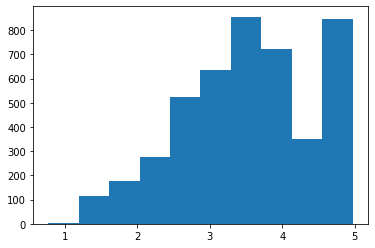

In [54]:
# HW3T6B
import matplotlib.pyplot as plt

#
# Show a histogram of predicted values from the previous block. Comment on
# why the range of the predicted values does or does not make sense.
#
plt.hist(reg_results)
print(min(reg_results))
print(max(reg_results))
#The histogram is left skewed and ranges between 0.772 to 4.971. 
#The range makes sense as the data roughly ranges from 1 to 5 as we saw in the annotated data given.
#The left skew indicates that the sentences with low relatedness score are drastically lower than
#sentences with high relatedness score

In [58]:
reg_results

array([3.82865942, 2.95179418, 4.35980405, ..., 1.74151648, 2.1233178 ,
       1.44008625])

In [75]:
# HW3T6C
# Compute a squared error value for each row of your data frame. This is easy:
# subtract the predicted value from the actual value (i.e., relatedness_score) 
# and square the result. You can use a for loop or a list comprehension. 

# Hint 1:
# Python's built-in zip() function allows you to bundle two vectors of data
# together into a list of tuples.
# Hint 2: 
# When extracting data from a Pandas column, sometimes you must use the 
# tolist() method to get the data into a structure that can be used for
# functions like zip().

#make the relatedness_score to list and zip both the list
df=list(zip(sick_data['relatedness_score'].tolist(),reg_results))
df
#iterating through the df and calculate difference btw predicted and actual
diff = [(x-y)**2 for x,y in df]


In [79]:
# HW3T6D
import numpy as np
# Use np.argmin() to find the index of the row in the Pandas dataset with the 
# smallest squared error of prediction

print(np.argmin(diff))
print(diff[27]) #lowest squared error
#Index of 27 is the index with the smallest square error of prediction

27
1.305580807444864e-07


In [80]:
# HW3T6E
# Use np.argmax() to find the index of the row with the largest squared error

print(np.argmax(diff))
print(diff[3235]) #highest squared erro
#Index of 3235 is the index with the largest square error of prediction

3235
3.6109745777934723


In [90]:
# HW3T6F
# Display the Pandas data from the row with the BEST prediction. Note that
# the iloc() method allows you to select a particular row.

#Lowest Squared error is the best prediction:
sick_data.iloc[27]

#Sentence A : People wearing costumes are gathering in a forest and are looking in the same direction
#Sentence B : Masked people are looking in the same direction in a forest
#These two sentences are very similar

pair_ID                                                               77
sentence_A             People wearing costumes are gathering in a for...
sentence_B             Masked people are looking in the same directio...
relatedness_score                                                    4.4
entailment_judgment                                           ENTAILMENT
cosine_similarity                                               0.784683
contra_dummy                                                           0
entail_dummy                                                           1
root_match                                                         False
Name: 27, dtype: object

In [94]:
# HW3T6G
# Display the Pandas data from the row with the worst prediction

#Highest Squared error is the worst prediction:
sick_data.iloc[3235]

#Sentence A : A black climber is rocking a dog
#Sentence B : The black dog is climbing on a rock
#These are very different sentences

pair_ID                                               7164
sentence_A                A black climber is rocking a dog
sentence_B             The black dog is climbing on a rock
relatedness_score                                      1.9
entailment_judgment                                NEUTRAL
cosine_similarity                                 0.810771
contra_dummy                                             0
entail_dummy                                             0
root_match                                           False
Name: 3235, dtype: object

HW3T6H

Replace this text with an explanation of why the argmin() case was "easy" to predict and the argmax() case was "hard" to predict. This explanation should consider the semantic content of the sentences in reference to the relatedness_score developed by the experts.

**argmin()** case of least error has squared error of 1.305580807444864e-07 <br>
Sentence A : People wearing costumes are gathering in a forest and are looking in the same direction<br>
Sentence B : Masked people are looking in the same direction in a forest<br>
These two sentences are very similar. This is easy to predict because the root verb of "looking" is present and all the words are semantically same. The meaning creates no confusion and is straightforward indicating the same things.<br>

**argmax()** case of highest error has 3.6109745777934723<br>
Sentence A : A black climber is rocking a dog<br>
Sentence B : The black dog is climbing on a rock<br>
These are very different sentences and mean different things while using the same words. The words like "black", "climb" "rock" are interchangeably used as noun and verbs with different meanings. It would be hard to interpret this in the context as they could confuse the semantic meanings of the words.

**Task 7: Write your own two contradictory sentences and predict the relatedness score**

In [95]:
# HW3T7A
# Replace these empty strings with your own sentences
test_sentenceA = "Nobody goes to that restaurant because it’s too crowded."
test_sentenceB = "That restaurant is always free and open to receive the public."

In [96]:
# HW3T7B
# Encode the sentences into vectors as was demonstrated for task 2.
a1 = model.encode(test_sentenceA)
b1 = model.encode(test_sentenceB)

In [97]:
# HW3T7C
# Compute the cosine similarity between the two vectors.
cos_sim(a1, b1).tolist()[0][0]

#the cosine similarity is 0.5687

0.568718671798706

In [98]:
# HW3T7D
# You may have used the formula interface for fitting your regression model
# with smf.ols(). If that's true, the easiest way to get a prediction for a
# novel case is to build a one-row Pandas dataframe and enter the X variables
# you need to make the prediction. The next two lines of commented code
# provide an exmaple of this technique: 
# temp_df = pd.DataFrame(columns=['similarity', 'dummy_entail', 'dummy_contra', 'root_match'])
# temp_df.loc[0] = [0.80, 0, 0] # You can include whatever X data you want in place of these three values
#
temp_df = pd.DataFrame(columns=['cosine_similarity', 'contra_dummy', 'entail_dummy', 'root_match'])
temp_df.loc[0] = [0.568718671798706, 1, 0,0]
temp_df

,cosine_similarity,contra_dummy,entail_dummy,root_match
0,0.5687,1.0,0.0,0.0


In [100]:
# HW3T7E
# Use the predict() method on your regression output object to make one 
# prediction of relatedness_score using the one-row Pandas dataframe from
# the previous step.
#
results.predict(temp_df)

0    3.092024
dtype: float64

HW3T7F

Replace this text with an interpretation of the output score from the prediction based on your two sentences.

The output score of relatedness is 3.09. The two sentences are talking about the same restaurant. While sentence is saying that this crowded, the other sentence says that it is free.
The model is giving a high value of relatedness as both are talking about the same subjects, but fail to understand the underlying meaning of them. This could mean that the model is not trained well enough to understand contrasting tone of emotions, in contexts like reviews. 

HWCC

Don't forget to write a concluding comment describing your findings. Provide an overview of your findings from the tasks you accomplished above. How well were you able to predict the relatedness score from the other variables? Did entailment or contradiction work as predictors and what does each coefficient say about our ability to predict relatedness scores? Would it be helpful to know something about entailment if we are trying to understand paraphrases? Why do we care about entailment in the context of an application such as chat?

**Concluding Comment:** <br>
From the above tasks, I have learnt to create a regression model to predict the relatedness score between two sentences, given their cosine similarity and their labels. The model did not do a great job in predicting the similarity when given a new sentence. This is because not all the variables contributed well towards the regression model. The model is penalizing us for including a lot of attributed, and we could try by using only the variables which are most relevent after feature engineering. The p-value and coefficient scores are suggesting that the given variables are not a great fit to the model. With better features and a different regression model, we could have been able to achieve better predictions.  <br>
It is of abundant importance to know about entailment when understanding paraphrases. Entailment indicates the similarity between the sentences and this is required to maintain a meaningful conversation in chats. The chat bots need to search the available data from semantically similar words in order to retreive answers and keep the conversation in flow. Understanding similarity over sentences is important in question answering, clustering and topic modeling. 
